#Working on MNIST Dataset

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

In [ ]:
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [ ]:
train_set = torchvision.datasets.MNIST("./data/", train = True, download=True)
valid_set = torchvision.datasets.MNIST("./data/", train = False, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.9MB/s]


In [ ]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [ ]:
valid_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

In [ ]:
x_0, y_0 = train_set[0]

In [ ]:
x_0

In [ ]:
type(x_0)

PIL.Image.Image

In [ ]:
y_0

5

#Tensors

In [ ]:
trans = transforms.Compose([transforms.ToTensor()])
x_0_tensor = trans(x_0)

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
x_0_tensor.dtype

torch.float32

In [ ]:
x_0_tensor.min()

tensor(0.)

In [ ]:
x_0_tensor.max()

tensor(1.)

In [ ]:
x_0_tensor.size()

torch.Size([1, 28, 28])

In [ ]:
x_0_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
x_0_tensor.device

device(type='cpu')

In [ ]:
x_0_gpu = x_0_tensor.cuda()
x_0_gpu.device

device(type='cuda', index=0)

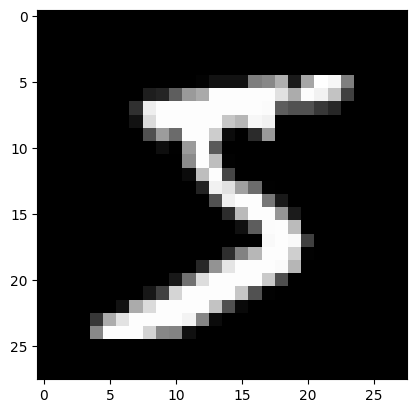

In [ ]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

In [ ]:
trans = transforms.Compose([transforms.ToTensor()])

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
train_set.transform = trans
valid_set.transform = trans

In [ ]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loaded = DataLoader(valid_set, batch_size=batch_size)

#Creating Model

In [ ]:
layers = []
layers

[]

In [ ]:
test_matrix = torch.tensor(
    [[1,2,3],
     [4,5,6],
     [7,8,9]]
)
test_matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
nn.Flatten()(test_matrix)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
batch_test_matrix = test_matrix[None, :]
batch_test_matrix

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
nn.Flatten()(batch_test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
nn.Flatten()(test_matrix[:, None])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
layers = [
    nn.Flatten()
]
layers

[Flatten(start_dim=1, end_dim=-1)]

#Input Layer

In [ ]:
input_size = 1*28*28

In [ ]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU()]

#Hidden Layer

In [ ]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU()
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU()]

#Output Layer

In [ ]:
n_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, n_classes)
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

#Compiling

In [ ]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
model = torch.compile(model)

#Training

In [ ]:
loss_function = nn.CrossEntropyLoss()

In [ ]:
optimizer = Adam(model.parameters())

In [ ]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loaded.dataset)

In [ ]:
def get_batch_accuracy(output, y, N):
  pred = output.argmax(dim=1, keepdim=True)
  correct = pred.eq(y.view_as(pred)).sum().item()
  return correct/N

In [ ]:
def train():
  loss=0
  accuracy=0

  model.train()
  for x,y in train_loader:
    x,y = x.to(device), y.to(device)
    output = model(x)
    optimizer.zero_grad()
    batch_loss = loss_function(output, y)
    batch_loss.backward()
    optimizer.step()

    loss += batch_loss.item()
    accuracy += get_batch_accuracy(output, y, train_N)
  print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [ ]:
def validate():
  loss = 0
  accuracy = 0

  model.eval()
  with torch.no_grad():
    for x,y in valid_loaded:
      x,y = x.to(device), y.to(device)
      output = model(x)

      loss += loss_function(output, y).item()
      accuracy += get_batch_accuracy(output, y, valid_N)
  print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [ ]:
epochs = 5

for epoch in range(epochs):
  print('Epoch: {}'.format(epoch))
  train()
  validate()

Epoch: 0


W0514 14:27:34.255000 245 torch/_inductor/utils.py:1137] [0/0] Not enough SMs to use max_autotune_gemm mode


Train - Loss: 380.1784 Accuracy: 0.9388
Valid - Loss: 32.5808 Accuracy: 0.9660
Epoch: 1
Train - Loss: 154.7863 Accuracy: 0.9743
Valid - Loss: 25.5467 Accuracy: 0.9741
Epoch: 2
Train - Loss: 106.2516 Accuracy: 0.9819
Valid - Loss: 24.4779 Accuracy: 0.9768
Epoch: 3
Train - Loss: 82.8112 Accuracy: 0.9854
Valid - Loss: 24.9953 Accuracy: 0.9760
Epoch: 4
Train - Loss: 65.7313 Accuracy: 0.9891
Valid - Loss: 27.7010 Accuracy: 0.9769


In [ ]:
prediction = model(x_0_gpu)
prediction

tensor([[-22.5433,  -7.4213, -14.5336,  12.7425, -26.4877,  13.8980, -16.2974,
         -11.8340, -14.0366,  -7.8545]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)

In [ ]:
prediction.argmax(dim=1, keepdim=True)

tensor([[5]], device='cuda:0')

In [ ]:
y_0

5

The model did quite well! The accuracy quickly reached close to 100%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.